In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 10,6 #declared for all graphs

In [2]:
df = pd.read_csv('healthcare_dataset.csv')
df.head(10)

,Name,Age,Gender,Blood Group Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,11/17/2022,Patrick Parker,Wallace-Hamilton,Medicare,37490.98336,146,Elective,12/1/2022,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,6/1/2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06485,404,Emergency,6/15/2023,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,1/9/2019,Paul Baker,Walton LLC,Medicare,36874.89700,292,Emergency,2/8/2019,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,5/2/2020,Brian Chandler,Garcia Ltd,Medicare,23303.32209,480,Urgent,5/3/2020,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,7/9/2021,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.34418,477,Urgent,8/2/2021,Paracetamol,Normal
5,Patrick Parker,41,Male,AB+,Arthritis,8/20/2020,Robin Green,Boyd PLC,Aetna,22522.36338,180,Urgent,8/23/2020,Aspirin,Abnormal
6,Charles Horton,82,Male,AB+,Hypertension,3/22/2021,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.43576,161,Urgent,4/15/2021,Lipitor,Abnormal
7,Patty Norman,55,Female,O-,Arthritis,5/16/2019,Brian Kennedy,Brown Inc,Blue Cross,13546.81725,384,Elective,6/2/2019,Aspirin,Normal
8,Ryan Hayes,33,Male,A+,Diabetes,12/17/2020,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.03727,215,Elective,12/22/2020,Aspirin,Abnormal
9,Sharon Perez,39,Female,O-,Asthma,12/15/2022,Jessica Bailey,Brown-Golden,Blue Cross,22788.23603,310,Urgent,12/16/2022,Aspirin,Normal


In [17]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Group Type       object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [14]:
df.shape

(10000, 15)

In [15]:
df['Blood Group Type'].unique()

array(['O-', 'O+', 'B-', 'AB+', 'A+', 'AB-', 'A-', 'B+'], dtype=object)

In [16]:
df['Medical Condition'].unique()

array(['Diabetes', 'Asthma', 'Obesity', 'Arthritis', 'Hypertension',
       'Cancer'], dtype=object)

In [18]:
cross_tab = pd.crosstab([df['Gender'], df['Blood Group Type']], df['Medical Condition'])

In [19]:
cross_tab

Medical Condition        Arthritis  Asthma  Cancer  Diabetes  Hypertension  \
Gender Blood Group Type                                                      
Female A+                       94     117     115       101           104   
       A-                      103     109     117        99            99   
       AB+                     105     102     107       102           107   
       AB-                     108     117     101       115           120   
       B+                      105     108     115        98           113   
       B-                       88     107     107       128            94   
       O+                      111     117     131        80           104   
       O-                      101      97      94       102            95   
Male   A+                      108     103     104        96           109   
       A-                       99      99     101       107           113   
       AB+                     114      97     101       105           104   
       AB-                      96      93      94        99           105   
       B+                       91     109      99       109            98   
       B-                       98     111     114        93           102   
       O+                      114     110      93        94           105   
       O-                      115     112     110        95           116   

Medical Condition        Obesity  
Gender Blood Group Type           
Female A+                     98  
       A-                    106  
       AB+                   114  
       AB-                   110  
       B+                    101  
       B-                    111  
       O+                     98  
       O-                    100  
Male   A+                     92  
       A-                     86  
       AB+                   100  
       AB-                   117  
       B+                     98  
       B-                     99  
       O+                     91  
       O-                    107

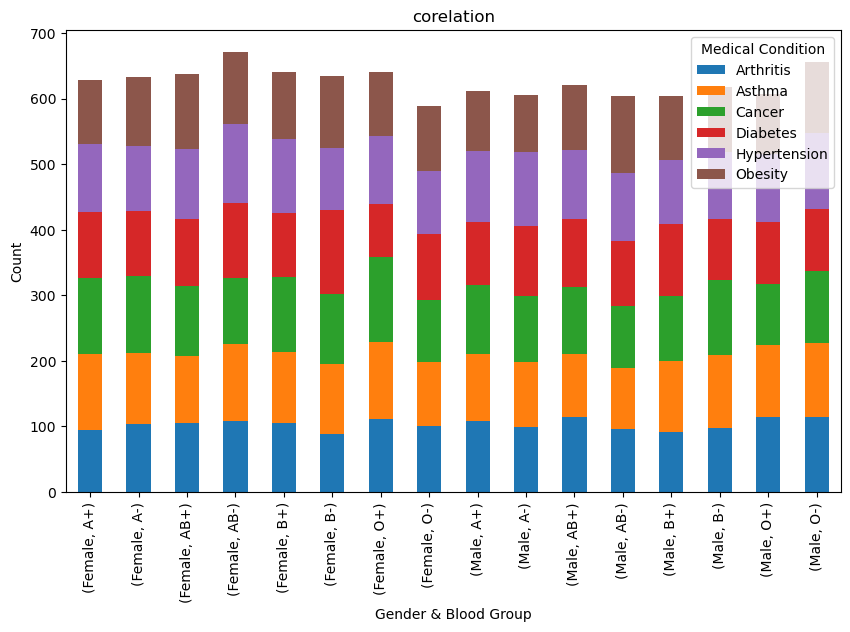

In [20]:
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Gender & Blood Group')
plt.ylabel('Count')
plt.title('corelation')
plt.legend(title='Medical Condition')
plt.show()

In [21]:
df['Medical Condition'].unique()

array(['Diabetes', 'Asthma', 'Obesity', 'Arthritis', 'Hypertension',
       'Cancer'], dtype=object)

In [22]:
df['Billing Amount'].head()

0    37490.98336
1    47304.06485
2    36874.89700
3    23303.32209
4    18086.34418
Name: Billing Amount, dtype: float64

In [23]:
pd.pivot_table(df,index=['Medical Condition'],values = ['Billing Amount'],aggfunc='mean')

,Billing Amount
Medical Condition,
Arthritis,25187.631255
Asthma,25416.869895
Cancer,25539.096133
Diabetes,26060.116129
Hypertension,25198.033973
Obesity,25720.842683
